### April 1, 2024
#### Noah Janes
# A Visual Data Analysis of Vancouver's Urban Greenery

## Introduction
This report analyzes data obtained from the [City of Vancouver's Open Data Portal](https://opendata.vancouver.ca/explore/dataset/street-trees/?information/disjunctive.species_name&disjunctive.common_name&disjunctive.on_street&disjunctive.neighbourhood_name) and follows an [Open Government Licence – Vancouver](https://opendata.vancouver.ca/pages/licence/).
Additional data containing the neighbourhoods of Vancouver and their land area in square kilometers is also used, whose values were obtained from the 2020 Social Indicators Profiles from **vancouver.ca/files/cov/social-indicators-profile-{name-of-neighbourhood}.pdf**. In the cases of Sunset, Oakridge, Mount Pleasant, Downtown, and South Cambie, the Social Indicators Profile did not contain the neighbourhood's area and as such, the values were obtained from **en.wikipedia.org/wiki/{name-of-neighbourhood}** 

The objective of this analysis is to determine 
1. How the number of trees planted yearly has changed historically
3. Which neighbourhood has the most trees in total. 
2. Which neighbourhood has the most trees per square kilometer. 

This information could benefit the city by providing knowledge of which neighbourhoods may benefit from having more trees planted in the future. 

## Analysis

### Importing Data

In [1]:
# Import required libraries
import pandas as pd
import altair as alt
import datetime
import json

# Enable PNG rendering
alt.renderers.enable('png')

# Read in data
km_sq = pd.read_csv("km_sq.csv")
trees = pd.read_csv("trees.csv")
trees_km = pd.read_csv("trees_km.csv")

### Data Description
The data comprises two data tables: `trees.csv`, and `km_sq.csv`. The trees data table contains the genus name, neighbourhood name, date planted, latitude, and longitude of trees planted in the City of Vancouver. The km_sq data table contains neighbourhood names and their land area in square kilometers.

#### `trees.csv`

In [2]:
pd.DataFrame(
    {
        "Column": [
            "std_street",
            "on_street",
            "species_name",
            "neighbourhood_name",
            "date_planted",
            "diameter",
            "street_side_name",
            "genus_name",
            "assigned",
            "civic_number",
            "plant_area",
            "curb",
            "tree_id",
            "common_name",
            "height_range_id",
            "on_street_block",
            "cultivar_name",
            "root_barrier",
            "latitude",
            "longitude",
        ],
        "Details": [
            "Street name of site",
            "Street name of tree",
            "Species of tree",
            "Name of neighbourhood",
            "Day tree was planted",
            "Diameter (inches)",
            "Side of street",
            "Genus of tree",
            "Associated with nearby lot?",
            "Street address of site",
            "B=behind sidewalk, C=cutout, G=in tree grate, L=lane, N=no sidewalk, P=park. Num = blvd. width (ft)",
            "Curb surrounding?",
            "Tree ID",
            "Common name of tree",
            "0=0-10ft, 1=10-20ft, ... ,10=100+ft",
            "Street block of tree",
            "Cultivar name of tree",
            "Root barrier installed?",
            "Latitude of tree",
            "Longitude of tree",
        ],
    }
).set_index(["Column", "Details"])

,
Column,Details
std_street,Street name of site
on_street,Street name of tree
species_name,Species of tree
neighbourhood_name,Name of neighbourhood
date_planted,Day tree was planted
diameter,Diameter (inches)
street_side_name,Side of street
genus_name,Genus of tree
assigned,Associated with nearby lot?


#### `km_sq.csv`

In [3]:
pd.DataFrame(
    {
        "Column": ["neighbourhood_name", "area_sq_km"],
        "Details": ["Name of neighbourhood", "Land area (sq. km)"],
    }
).set_index(["Column", "Details"])

,
Column,Details
neighbourhood_name,Name of neighbourhood
area_sq_km,Land area (sq. km)


The columns of interest in the above data tables are **neighbourhood_name**, **date_planted**, **latitude**, **longitude**, and **area_sq_km**. The dataframe has already been wrangled and the columns of interest contain no null values. These columns are key to evaluating the question of interest as **neighbourhood_name** allows for grouping trees by neighbourhood, **date_planted** allows for grouping trees by year, **latitude** and **longitude** allow for plotting heatmap projections to visualize the concentration of trees in a given area, and **area_sq_km** provides the information necessaary to estimate the count of trees per square kilometer.

### Summary Statistics
Below are information and summary statistics of the `trees` and `km_sq` data frames, obtained using the pandas library `.info()` and `.describe()` methods.

#### `trees.csv`

In [4]:
# View columns and data types
trees.info()
print("\n")

# View summary statistics

trees.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5000 non-null   int64  
 1   std_street          5000 non-null   object 
 2   on_street           5000 non-null   object 
 3   species_name        5000 non-null   object 
 4   neighbourhood_name  5000 non-null   object 
 5   date_planted        2363 non-null   object 
 6   diameter            5000 non-null   float64
 7   street_side_name    5000 non-null   object 
 8   genus_name          5000 non-null   object 
 9   assigned            5000 non-null   object 
 10  civic_number        5000 non-null   int64  
 11  plant_area          4950 non-null   object 
 12  curb                5000 non-null   object 
 13  tree_id             5000 non-null   int64  
 14  common_name         5000 non-null   object 
 15  height_range_id     5000 non-null   int64  
 16  on_str

,Unnamed: 0,std_street,on_street,species_name,neighbourhood_name,date_planted,diameter,street_side_name,genus_name,assigned,...,plant_area,curb,tree_id,common_name,height_range_id,on_street_block,cultivar_name,root_barrier,latitude,longitude
count,5000.000000,5000,5000,5000,5000,2363,5000.000000,5000,5000,5000,...,4950,5000,5000.000000,5000,5000.00000,5000.000000,2658,5000,5000.000000,5000.000000
unique,NaN,603,607,171,22,1599,NaN,4,67,2,...,38,2,NaN,361,NaN,NaN,176,2,NaN,NaN
top,NaN,W 13TH AV,CAMBIE ST,SERRULATA,Renfrew-Collingwood,2004-02-16,NaN,ODD,ACER,N,...,10,Y,NaN,KWANZAN FLOWERING CHERRY,NaN,NaN,KWANZAN,N,NaN,NaN
freq,NaN,52,49,463,384,7,NaN,2554,1218,4564,...,736,4593,NaN,383,NaN,NaN,383,4679,NaN,NaN
mean,14861.920400,NaN,NaN,NaN,NaN,NaN,12.340888,NaN,NaN,NaN,...,NaN,NaN,128682.584600,NaN,2.73440,2960.227000,NaN,NaN,49.247349,-123.107128
std,8680.023278,NaN,NaN,NaN,NaN,NaN,9.266600,NaN,NaN,NaN,...,NaN,NaN,75412.260406,NaN,1.56957,2086.861052,NaN,NaN,0.021251,0.049137
min,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,36.000000,NaN,0.00000,0.000000,NaN,NaN,49.202783,-123.220560
25%,7192.750000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,...,NaN,NaN,61321.500000,NaN,2.00000,1300.000000,NaN,NaN,49.230152,-123.144178
50%,14870.000000,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,...,NaN,NaN,130130.500000,NaN,2.00000,2600.000000,NaN,NaN,49.247981,-123.105861
75%,22366.750000,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,...,NaN,NaN,191332.000000,NaN,4.00000,4100.000000,NaN,NaN,49.263275,-123.063484


#### `km_sq.csv`

In [5]:
# View columns and data types
km_sq.info()

print("\n")

# View summary statistics
km_sq.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   neighbourhood_name  22 non-null     object 
 1   area_sq_km          22 non-null     float64
dtypes: float64(1), object(1)
memory usage: 484.0+ bytes




,area_sq_km
count,22.000000
mean,5.381818
std,2.058811
min,2.000000
25%,3.850000
50%,5.100000
75%,6.525000
max,9.600000


### Methods

The variable in common between the two data tables is neighbourhood name. The `trees_km.csv` data frame below is made from the merging of `trees.csv` and `km_sq.csv` on the neighbourhood_name column using the `.merge()` method from the pandas library. I used the `dropna()` method to remove rows in the columns of interest with missing data, particularily in the `date_planted` column. I used `.dt.month` to modify the `month` column to show only the year. I then filter the data using `.loc[]` to remove the columns that are not of interest. The **count** column was made using the `.value_counts()` method from the pandas library, and the **count_per_area** column was made by dividing **count** by **area_sq_km**. 

#### `trees_km.csv`

In [6]:
pd.DataFrame(
    {
        "Column":[
            "neighbourhood_name",
            "date_planted",
            "latitude",
            "longitude",
            "area_sq_km",
            "count",
            "count_per_km",
        ],
        "Details": [
            "Name of neighbourhood",
            "Day tree was planted",
            "Latitude of tree",
            "Longitude of tree",
            "Neighbourhood area (sq. km)",
            "Count of trees",
            "Trees per sq. km",
        ],
    }
).set_index(["Column", "Details"])

,
Column,Details
neighbourhood_name,Name of neighbourhood
date_planted,Day tree was planted
latitude,Latitude of tree
longitude,Longitude of tree
area_sq_km,Neighbourhood area (sq. km)
count,Count of trees
count_per_km,Trees per sq. km


In [7]:
# View columns and data types
trees_km.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   neighbourhood_name  2363 non-null   object 
 1   date_planted        2363 non-null   int64  
 2   latitude            2363 non-null   float64
 3   longitude           2363 non-null   float64
 4   area_sq_km          2363 non-null   float64
 5   count               2363 non-null   int64  
 6   count_per_area      2363 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 129.4+ KB


In [8]:
# View summary statistics
trees_km.describe(include="all")

,neighbourhood_name,date_planted,latitude,longitude,area_sq_km,count,count_per_area
count,2363,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000
unique,22,NaN,NaN,NaN,NaN,NaN,NaN
top,Renfrew-Collingwood,NaN,NaN,NaN,NaN,NaN,NaN
freq,216,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2003.265764,49.246339,-123.101582,5.954846,129.990267,22.100355
std,NaN,7.126328,0.021324,0.048970,1.864383,51.050011,5.743750
min,NaN,1989.000000,49.203531,-123.220560,2.000000,32.000000,8.333000
25%,NaN,1997.000000,49.228684,-123.137739,4.600000,94.000000,18.136000
50%,NaN,2003.000000,49.245408,-123.099248,5.600000,113.000000,25.375000
75%,NaN,2009.000000,49.263186,-123.058156,8.000000,180.000000,26.508000


## Results


### Line plot

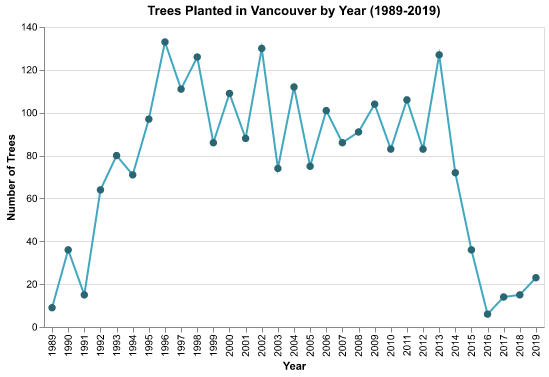

In [9]:
#Theme Colours
light_blue = "#41a8bf"
dark_blue = "#2b6673"

# Create slider widget
year_slider = alt.binding_range(name="Year: ", min=1989, max=2019, step=1)
select_year = alt.selection_point(
    fields=["date_planted"], bind=year_slider, value=2019
)

# Create line plot
trees_line = (
    alt.Chart(trees_km)
    .mark_line(color=light_blue)
    .encode(
        alt.X("date_planted:O"),
        alt.Y("count()", title="Number of Trees"),
        tooltip=[
            alt.Tooltip("date_planted:O", title="Date planted"),
            alt.Tooltip("count()", title="Total trees"),
        ],
    )
    .properties(
        width=500, height=300, title="Trees Planted in Vancouver by Year (1989-2019)"
    ).add_params(select_year)
)

# Overlay points
trees_point = (
    alt.Chart(trees_km)
    .mark_point(color=dark_blue, fill=dark_blue)
    .encode(
        alt.X("date_planted:O", title="Year"),
        alt.Y("count()", title="Number of Trees"),
        tooltip=[
            alt.Tooltip("date_planted:O", title="Year"),
            alt.Tooltip("count()", title="Total trees"),
        ],
    )
    .properties(
        width=500, height=300, title="Trees Planted in Vancouver by Year (1989-2019)"
    )
)

trees_linear = (trees_line + trees_point).encode(opacity=alt.condition((alt.datum.date_planted <= select_year.date_planted),
                    alt.value(1),
                    alt.value(0.3))).add_params(select_year)        
trees_linear

The line plot above illustrates the answer to the first question of interest. The number of trees planted yearly from 1989 to 2019. From 1989 until 1996, the number of trees planted increased yearly to a maximum of 133 in 1996. From then until 2013, the number of trees planted annually ranged from ~74-133. From 2013 to 2016, the amount of trees planted annually decreased substantially to a minimum of 6 trees planted in this sample in 2016.

### Scatter plot

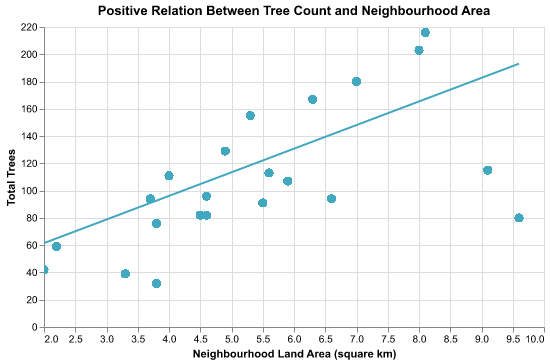

In [10]:
# Create selection for neighbourhood
hover_name = alt.selection_point(fields=["neighbourhood_name"], on="mouseover")

# Create slider widget
size_slider = alt.binding_range(name='Land Area: ', min=2.1, max=10, step=0.1)
select_neighbourhood_size = alt.selection_point(
    fields=['area_sq_km'],
    bind=size_slider,
    value = 10)

# Create base scatter plot
scatter_base = (
    (
        alt.Chart(trees_km)
        .mark_circle(size=70)
        .encode(
            x=alt.X(
                "area_sq_km:Q",
                title="Neighbourhood Land Area (square km)",
                scale=alt.Scale(zero=False),
            ),
            y=alt.Y("count:Q", title="Total Trees"),
            tooltip=[
                alt.Tooltip("neighbourhood_name", title="Neighbourhood"),
                alt.Tooltip("area_sq_km", title="Land Area (sq. km)"),
                alt.Tooltip("count", title="Total Trees"),
            ],
            opacity=(
                alt.condition(
                    (alt.datum.area_sq_km < select_neighbourhood_size.area_sq_km),
                    alt.value(1),
                    alt.value(0),
                )
            ),
            color=alt.condition(hover_name, alt.value(light_blue), alt.value("grey")),
        )
    )
    .properties(width=500, height=300)
    .interactive()
)

# Add regression line
scatter_line = (
    scatter_base
    + scatter_base.transform_regression("area_sq_km", "count").mark_line(
        color=dark_blue,
        opacity=0.5,
    )

).properties(
    width=500,
    height=300,
    title="Positive Relation Between Tree Count and Neighbourhood Area",
)

trees_scatter = (scatter_base + scatter_line).add_params(
    select_neighbourhood_size, hover_name
)
trees_scatter

This scatter plot illustrates the positive relationship between the total number of trees and land area in square kilometers. As expected, larger neighbourhoods generally have more trees in them. The slider along the bottom of the plot filters the plot data by changing the maximum land area value. The neighbourhood with the greatest total trees is Renfrew-Collingwood, and the neighbourhood with the least trees is Strathcona. The neighbourhood with the greatest land area is Mount Pleasant, and the neighbourhood with the least land area is West End.

### Bar plot

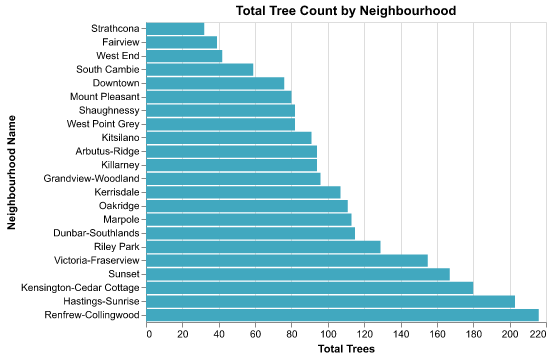

In [11]:
# Create bar plot
trees_bar = (
    alt.Chart(trees_km)
    .mark_bar(color=light_blue)
    .encode(
        alt.X("count()", title="Total Trees"),
        alt.Y("neighbourhood_name", title="Neighbourhood Name", sort="x"),
        tooltip=[
            alt.Tooltip("neighbourhood_name", title="Neighbourhood"),
            alt.Tooltip("count:Q", title="Total Trees"),
        ],
        color=alt.condition(hover_name, alt.value(light_blue), alt.value('grey')),
    ).add_params(hover_name)
    .properties(width=400, height=300, title="Total Tree Count by Neighbourhood")
)
trees_bar

This bar plot shows the total number of trees for each neighbourhood on the y-axis. The neighbourhood with the most total trees is Renfrew-Collingwood, having 216 trees planted in this sample. The neighbourhood with the fewest total trees is Strathcona, having 32 trees planted in this sample. Between the scatter plot above and this bar plot, it is evident that the neighbourhood with the most total trees is Renfrew-Collingwood; this answers the second question of interest. 

### Chloropleth

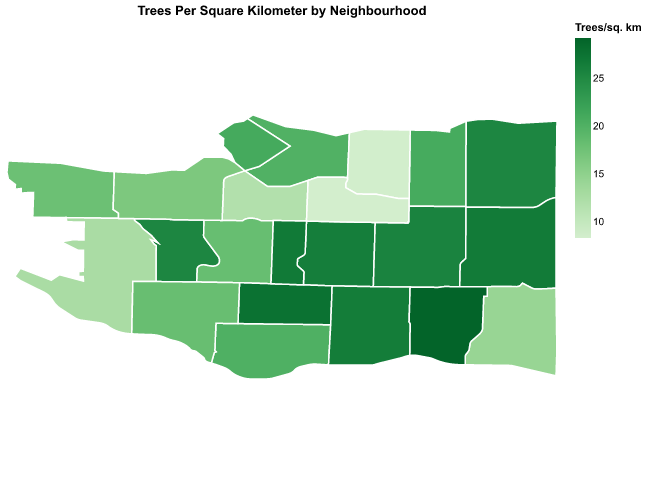

In [12]:
# Geojson file for Vancouver map
url_geojson = "https://raw.githubusercontent.com/UBC-MDS/exploratory-data-viz/main/data/local-area-boundary.geojson"
alt.data_transformers.enable("default", max_rows=1000000)

# Format geojson as topo json with alt.Data()
data_geojson = alt.Data(
    url=url_geojson, format=alt.DataFormat(property="features", type="json")
)

# Create dataframe with matching column names to geojson file
trees_km_copy = trees_km.copy()
trees_km_copy.rename(columns={"neighbourhood_name": "name"}, inplace=True)

"""
base = alt.Chart(data_geojson).mark_geoshape(
    color = 'gray', opacity= 0.5, stroke='white').encode(
).project(type='identity', reflectY=True)


# Create dropdown widget
names = sorted(trees_km['neighbourhood_name'].unique())
name_dropdown = alt.binding_select(name='Neighbourhood: ', options=names)
select_name= alt.selection_single(fields=['neighbourhood_name'], bind=name_dropdown)
"""
# Plot with tooltip for neighbourhood name
trees_geo = (
    alt.Chart(data_geojson)
    .mark_geoshape(stroke="white", strokeWidth=1.5)
    .encode(
        color=alt.Color(
            "count_per_area:Q",
            title="Trees/sq. km",
        ).scale(scheme="greens"),
        tooltip=[
            alt.Tooltip("name:N", title="Neighbourhood"),
            alt.Tooltip("count_per_area:Q", title="Trees per sq. km"),
        ],
    )
    .transform_lookup(
        lookup="properties.name",
        from_=alt.LookupData(trees_km_copy, "name", ["count_per_area", "name"]),
    )
    .project(type="identity", reflectY=True)
    .properties(
        width=550, height=450, title="Trees Per Square Kilometer by Neighbourhood"
    )
)
trees_geo

Figure 4: Chloropleth map showing number of trees per sq. km., divided by neighbourhood.

The differences in number of trees per square kilometer (trs/sq. km) between neighbourhoods in the sample is illustrated by figure 4 above. This figure and provides an answer to the third question of interest; Victoria-Fraserview has the highest number of trs/sq. km (29.245), and Mount Pleasant has the lowest (8.333). Mousing over a neighbourhood will show its name and trs/sq. km. The chloropleth map in the dashboard below has a more precise gradient scale.

## Discussion

Between 1989 and 2019, the annual tree planting numbers followed distinct patterns as evident in (figure 1). I was surprised, as I had not expected to see the number of trees planted declining in recent years, but rather, I expected a steady incline.

As seen in figure 2, there is a clear positive relationship between the total number of trees and neighbourhood land area in this sample. As anticipated, larger neighborhoods tend to have more trees. Mount Pleasant has the largest land area, and West End the smallest. Renfrew-Collingwood was found to be the neighborhood with the highest total tree count, while Strathcona has the fewest total trees (figure 3). Figure 4 shows that Victoria-Fraserview has the highest density of trees per square kilometer, while Mount Pleasant has the lowest.

While these insights may be worth discussing, it must be noted that no significant inferences can be drawn from this analysis as the sample used comprises a subset of a larger dataset and approximately half of the smaller subset could not be used as the entries were missing values for the date_planted column.

The visualizations could be improved and made more easliy interpretable by incorporating more interaction between them, such as being able to select neighbourhoods by clicking the chloropleth map, for example. Alternatively, perhaps the data could be visualized in a different configuration, as it is arguably redundant to have the bar plot when the same information can be extrapolated from the scatter plot. I do however believe that the bar plot is more easily interpretable in terms of finding the neighbourhood with the most total trees, while the scatter plot includes the neighbourhood land area. 


## Dashboard

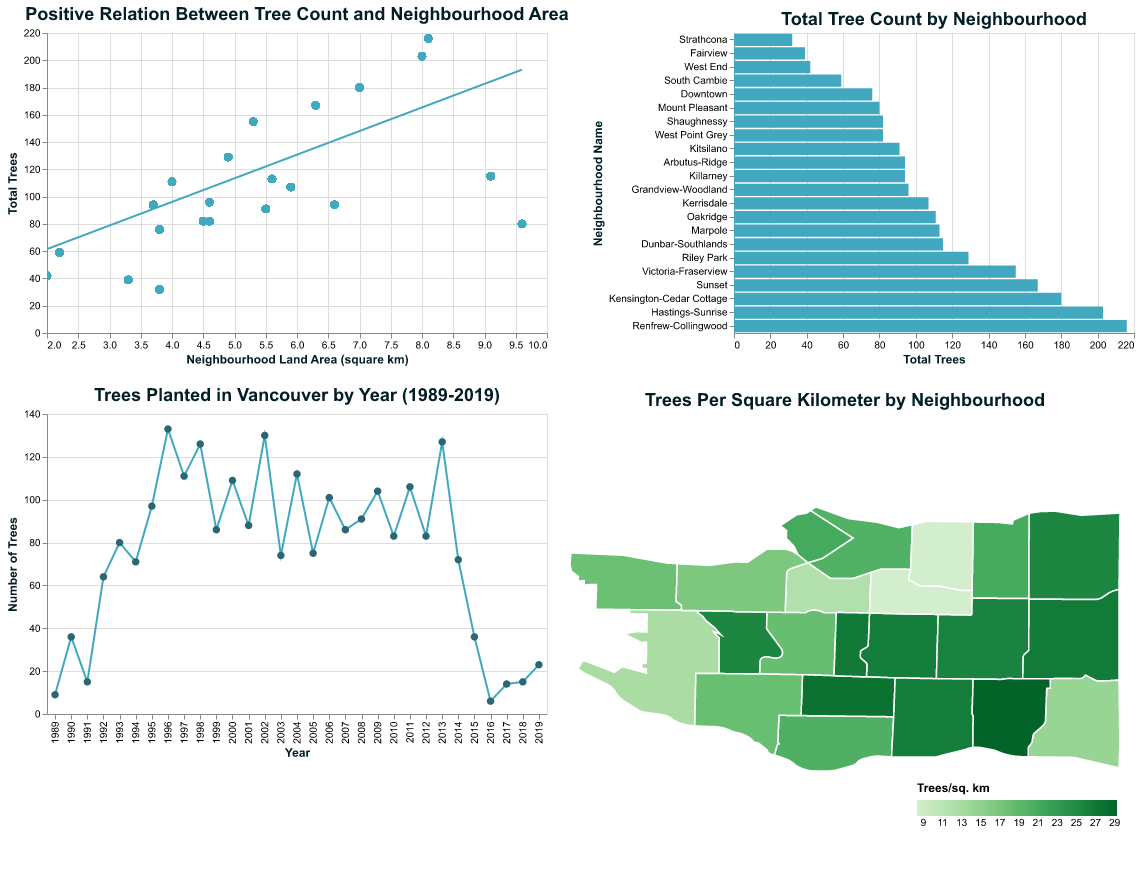

In [13]:
(
    (
        (trees_scatter)
        | (trees_bar)
    )
    & ((trees_linear) | (trees_geo))
).configure_legend(
    gradientLength=200,
    tickCount=15,
    orient="none",
    legendX=870,
    legendY=750,
    direction="horizontal",
    titleFontSize = 12
).configure_title(
    fontSize=18, color="#011d25"
).configure_axis(
    titleFontSize=12, titleColor="#011d25"
)